*Step 1: Install Required Libraries*

In [28]:
pip install psycopg2-binary


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import pandas as pd
from sqlalchemy import create_engine
import psycopg2

Step 2: Database Connection Code

In [30]:

username = 'postgres'
password = 'ananya'
host = 'localhost'
port = '5432'
db_name = 'Materialecopack'

engine = create_engine(f'postgresql://{username}:{password}@{host}:{port}/{db_name}')

query = "SELECT * FROM materials"
df = pd.read_sql(query, engine)

print(df.head())

   material_id                 material_name  strength  weight_capacity  cost  \
0            1                   Molded Pulp         7                7     9   
1            2      Recycled Paper Pulp Tray         6                6     9   
2            3   Recycled Corrugated Inserts         8                8     8   
3            4  Lightweight Corrugated Board         7                7     8   
4            5          Corrugated Cardboard         8                8     9   

   biodegradability_score  co2_score  recyclability_percentage  
0                       9          9                        95  
1                       9          9                        95  
2                       8          8                        90  
3                       8          8                        90  
4                       8          8                        90  


## Step 1.5: Exploratory Data Analysis (EDA)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


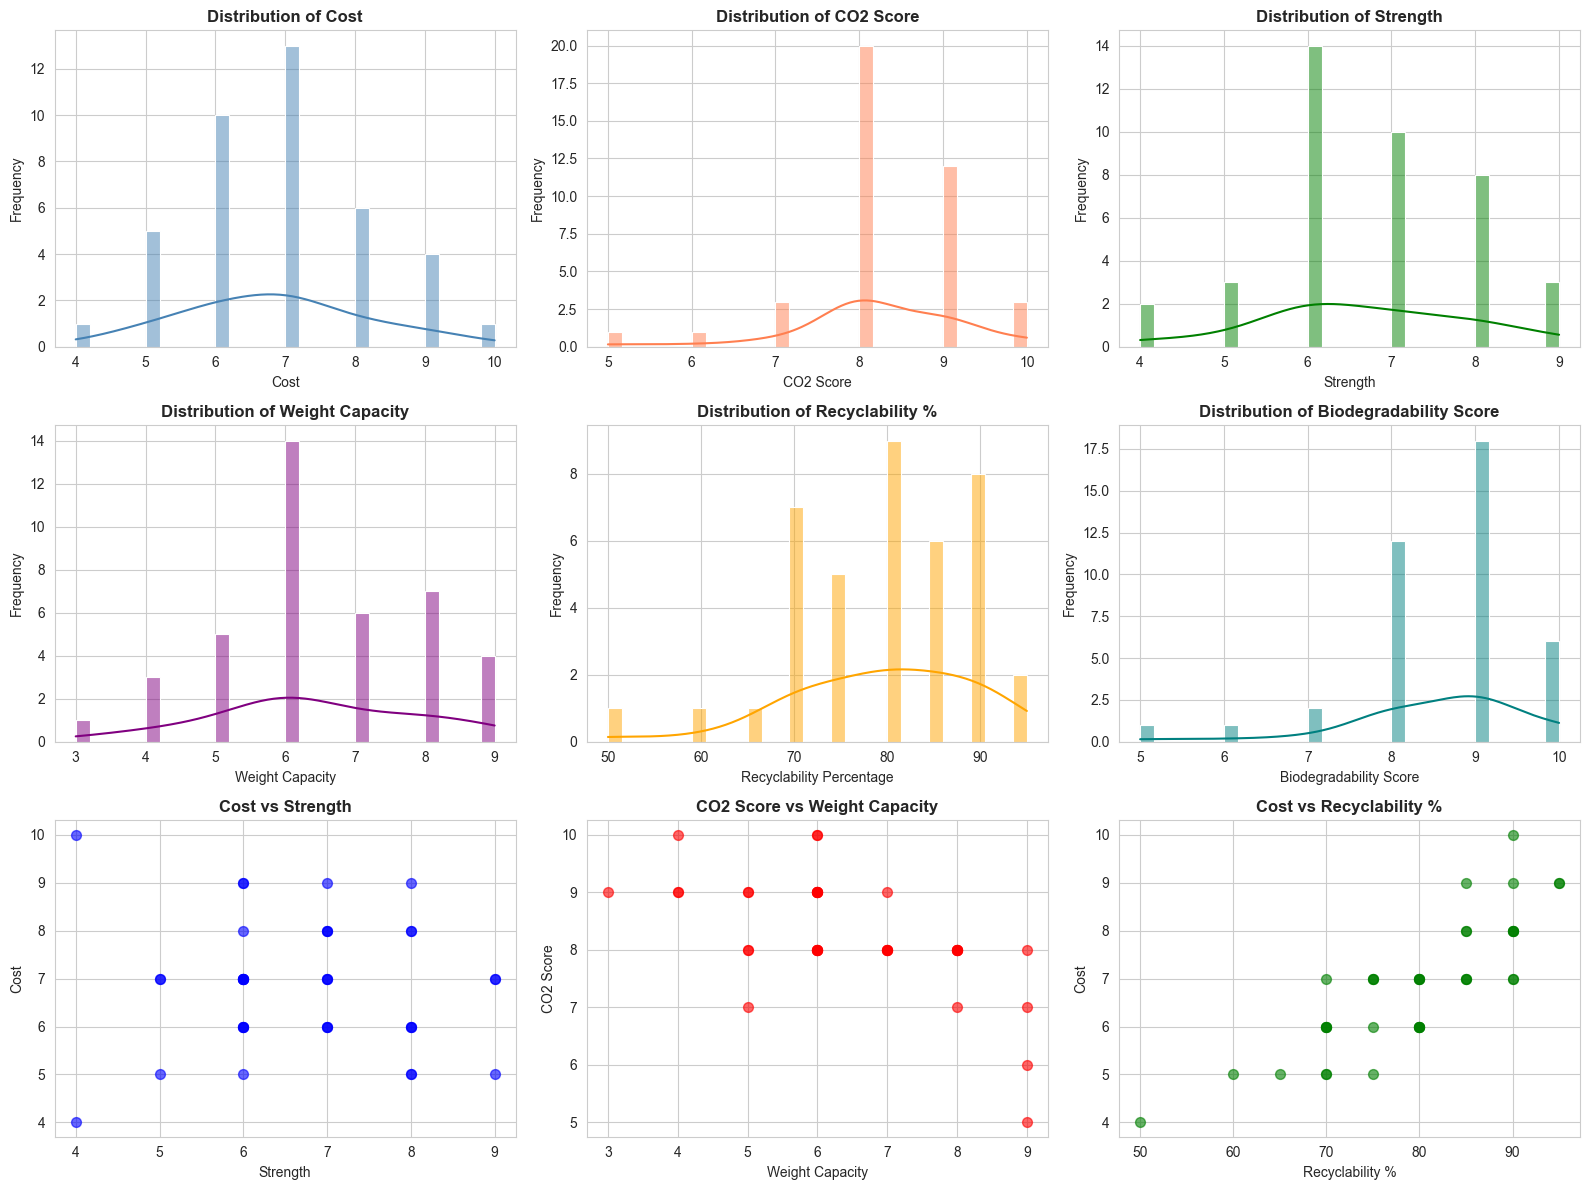

EDA Summary Statistics:
       material_id   strength  weight_capacity       cost  \
count    40.000000  40.000000        40.000000  40.000000   
mean     20.500000   6.700000         6.450000   6.850000   
std      11.690452   1.244475         1.501282   1.331088   
min       1.000000   4.000000         3.000000   4.000000   
25%      10.750000   6.000000         6.000000   6.000000   
50%      20.500000   7.000000         6.000000   7.000000   
75%      30.250000   8.000000         8.000000   8.000000   
max      40.000000   9.000000         9.000000  10.000000   

       biodegradability_score  co2_score  recyclability_percentage  
count               40.000000  40.000000                 40.000000  
mean                 8.575000   8.250000                 79.500000  
std                  1.059451   0.980581                  9.792724  
min                  5.000000   5.000000                 50.000000  
25%                  8.000000   8.000000                 73.750000  
50%         

In [31]:
%pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 12)

# Create a comprehensive EDA figure with multiple subplots
fig = plt.figure(figsize=(16, 12))

# 1. Distribution of Cost (Target Variable)
ax1 = plt.subplot(3, 3, 1)
sns.histplot(df['cost'], kde=True, ax=ax1, color='steelblue', bins=30)
ax1.set_title('Distribution of Cost', fontsize=12, fontweight='bold')
ax1.set_xlabel('Cost')
ax1.set_ylabel('Frequency')

# 2. Distribution of CO2 Score (Target Variable)
ax2 = plt.subplot(3, 3, 2)
sns.histplot(df['co2_score'], kde=True, ax=ax2, color='coral', bins=30)
ax2.set_title('Distribution of CO2 Score', fontsize=12, fontweight='bold')
ax2.set_xlabel('CO2 Score')
ax2.set_ylabel('Frequency')

# 3. Distribution of Strength
ax3 = plt.subplot(3, 3, 3)
sns.histplot(df['strength'], kde=True, ax=ax3, color='green', bins=30)
ax3.set_title('Distribution of Strength', fontsize=12, fontweight='bold')
ax3.set_xlabel('Strength')
ax3.set_ylabel('Frequency')

# 4. Distribution of Weight Capacity
ax4 = plt.subplot(3, 3, 4)
sns.histplot(df['weight_capacity'], kde=True, ax=ax4, color='purple', bins=30)
ax4.set_title('Distribution of Weight Capacity', fontsize=12, fontweight='bold')
ax4.set_xlabel('Weight Capacity')
ax4.set_ylabel('Frequency')

# 5. Distribution of Recyclability Percentage
ax5 = plt.subplot(3, 3, 5)
sns.histplot(df['recyclability_percentage'], kde=True, ax=ax5, color='orange', bins=30)
ax5.set_title('Distribution of Recyclability %', fontsize=12, fontweight='bold')
ax5.set_xlabel('Recyclability Percentage')
ax5.set_ylabel('Frequency')

# 6. Distribution of Biodegradability Score
ax6 = plt.subplot(3, 3, 6)
sns.histplot(df['biodegradability_score'], kde=True, ax=ax6, color='teal', bins=30)
ax6.set_title('Distribution of Biodegradability Score', fontsize=12, fontweight='bold')
ax6.set_xlabel('Biodegradability Score')
ax6.set_ylabel('Frequency')

# 7. Cost vs Strength
ax7 = plt.subplot(3, 3, 7)
ax7.scatter(df['strength'], df['cost'], alpha=0.6, color='blue', s=50)
ax7.set_title('Cost vs Strength', fontsize=12, fontweight='bold')
ax7.set_xlabel('Strength')
ax7.set_ylabel('Cost')

# 8. CO2 Score vs Weight Capacity
ax8 = plt.subplot(3, 3, 8)
ax8.scatter(df['weight_capacity'], df['co2_score'], alpha=0.6, color='red', s=50)
ax8.set_title('CO2 Score vs Weight Capacity', fontsize=12, fontweight='bold')
ax8.set_xlabel('Weight Capacity')
ax8.set_ylabel('CO2 Score')

# 9. Recyclability vs Cost
ax9 = plt.subplot(3, 3, 9)
ax9.scatter(df['recyclability_percentage'], df['cost'], alpha=0.6, color='green', s=50)
ax9.set_title('Cost vs Recyclability %', fontsize=12, fontweight='bold')
ax9.set_xlabel('Recyclability %')
ax9.set_ylabel('Cost')

plt.tight_layout()
plt.show()

print("EDA Summary Statistics:")
print(df.describe())

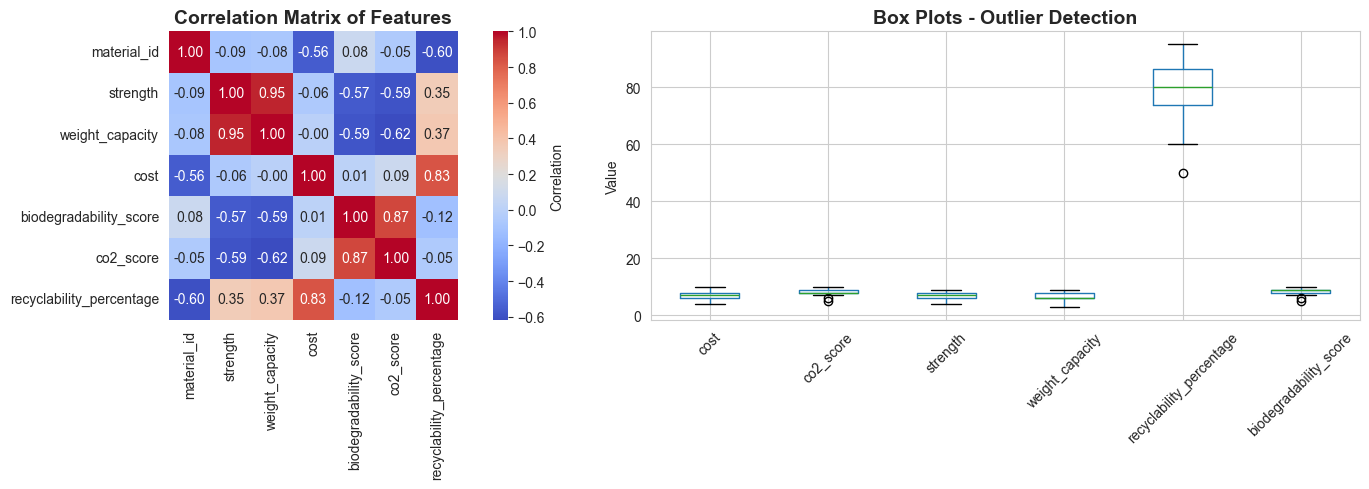


=== DATA QUALITY REPORT ===

Dataset Shape: (40, 8)

Missing Values:
material_id                 0
material_name               0
strength                    0
weight_capacity             0
cost                        0
biodegradability_score      0
co2_score                   0
recyclability_percentage    0
dtype: int64

Data Types:
material_id                  int64
material_name               object
strength                     int64
weight_capacity              int64
cost                         int64
biodegradability_score       int64
co2_score                    int64
recyclability_percentage     int64
dtype: object

Basic Statistics:
       material_id   strength  weight_capacity       cost  \
count    40.000000  40.000000        40.000000  40.000000   
mean     20.500000   6.700000         6.450000   6.850000   
std      11.690452   1.244475         1.501282   1.331088   
min       1.000000   4.000000         3.000000   4.000000   
25%      10.750000   6.000000         6.000000

In [32]:
## Correlation and Data Quality Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, ax=axes[0], cbar_kws={'label': 'Correlation'})
axes[0].set_title('Correlation Matrix of Features', fontsize=14, fontweight='bold')

# Box plots for outlier detection
ax2 = axes[1]
df[['cost', 'co2_score', 'strength', 'weight_capacity', 'recyclability_percentage', 'biodegradability_score']].boxplot(ax=ax2)
ax2.set_title('Box Plots - Outlier Detection', fontsize=14, fontweight='bold')
ax2.set_ylabel('Value')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Data Quality Report
print("\n=== DATA QUALITY REPORT ===")
print(f"\nDataset Shape: {df.shape}")
print(f"\nMissing Values:\n{df.isnull().sum()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nBasic Statistics:\n{df.describe()}")

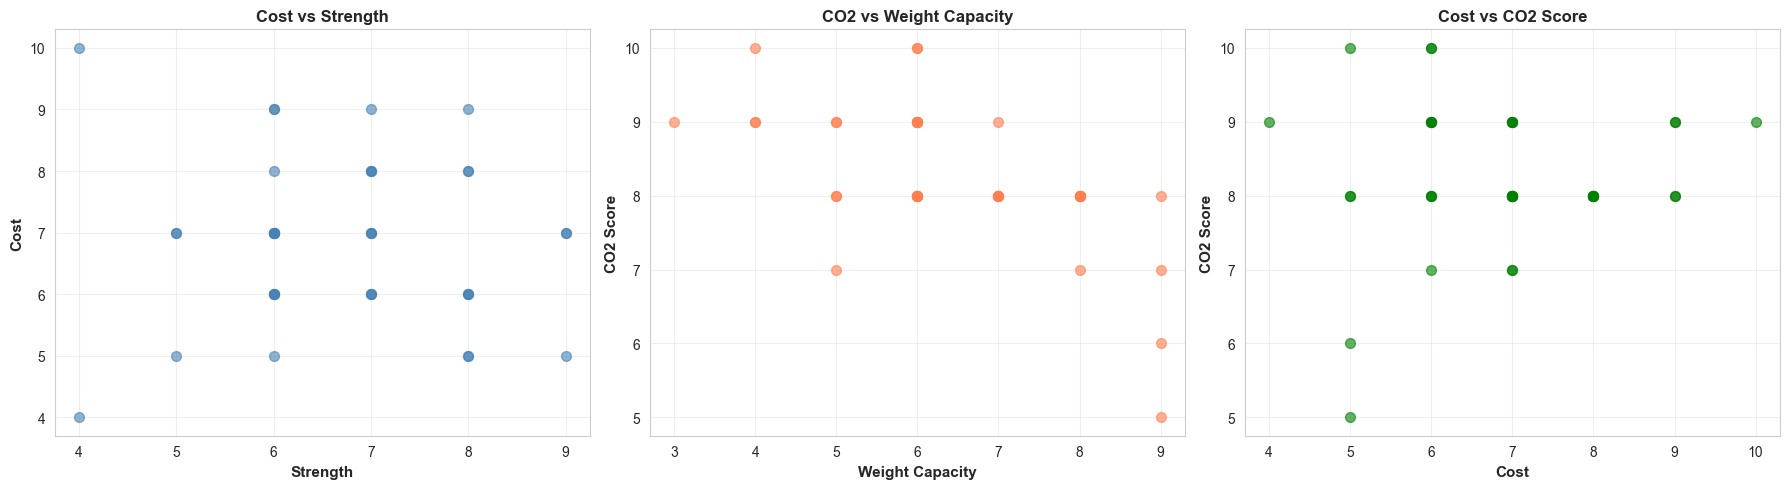


=== KEY CORRELATIONS ===

Cost vs Strength Correlation: -0.059
CO2 vs Weight Capacity Correlation: -0.618
Cost vs CO2 Correlation: 0.088


In [33]:
## Key Correlation Graphs

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Cost vs Strength
axes[0].scatter(df['strength'], df['cost'], alpha=0.6, s=50, color='steelblue')
axes[0].set_xlabel('Strength', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Cost', fontsize=11, fontweight='bold')
axes[0].set_title('Cost vs Strength', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 2. CO2 Score vs Weight Capacity
axes[1].scatter(df['weight_capacity'], df['co2_score'], alpha=0.6, s=50, color='coral')
axes[1].set_xlabel('Weight Capacity', fontsize=11, fontweight='bold')
axes[1].set_ylabel('CO2 Score', fontsize=11, fontweight='bold')
axes[1].set_title('CO2 vs Weight Capacity', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# 3. Cost vs CO2 (Target Variables Relationship)
axes[2].scatter(df['cost'], df['co2_score'], alpha=0.6, s=50, color='green')
axes[2].set_xlabel('Cost', fontsize=11, fontweight='bold')
axes[2].set_ylabel('CO2 Score', fontsize=11, fontweight='bold')
axes[2].set_title('Cost vs CO2 Score', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical Summary
print("\n=== KEY CORRELATIONS ===")
print(f"\nCost vs Strength Correlation: {df['cost'].corr(df['strength']):.3f}")
print(f"CO2 vs Weight Capacity Correlation: {df['co2_score'].corr(df['weight_capacity']):.3f}")
print(f"Cost vs CO2 Correlation: {df['cost'].corr(df['co2_score']):.3f}")

Step 1: Define Features and Targets

In [34]:
# features
from sklearn.model_selection import train_test_split

features = [
    'strength',
    'weight_capacity',
    'recyclability_percentage',
    'biodegradability_score'
]

# use recorded cost labels (avoid recomputing to prevent leakage)
X = df[features]
y_cost = df['cost']
y_co2 = df['co2_score']

# drop rows with missing targets if any
mask = y_cost.notna() & y_co2.notna()
X = X[mask]
y_cost = y_cost[mask]
y_co2 = y_co2[mask]

# single split
X_train, X_test, y_cost_train, y_cost_test, y_co2_train, y_co2_test = train_test_split(
    X, y_cost, y_co2, test_size=0.2, random_state=42
)


Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_cost_train, y_cost_test = train_test_split(
    X, y_cost, test_size=0.2, random_state=42
)

_, _, y_co2_train, y_co2_test = train_test_split(
    X, y_co2, test_size=0.2, random_state=42
)

In [35]:
# using stored cost labels; no recompute here


Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model 1 — Cost Prediction (Random Forest)

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf_cost = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_cost.fit(X_train_scaled, y_cost_train)
y_cost_pred = rf_cost.predict(X_test_scaled)


Evaluation

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_cost = mean_absolute_error(y_cost_test, y_cost_pred)
rmse_cost = np.sqrt(mean_squared_error(y_cost_test, y_cost_pred))
r2_cost = r2_score(y_cost_test, y_cost_pred)

print("Cost MAE:", mae_cost)
print("Cost RMSE:", rmse_cost)
print("Cost R2:", r2_cost)

Cost MAE: 0.28562500000000013
Cost RMSE: 0.47036222743753575
Cost R2: 0.775247619047619


Model 2 — CO₂ Prediction (XGBoost)

In [39]:
!pip install xgboost


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\ananya inala\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [40]:
%pip install xgboost
from xgboost import XGBRegressor

xgb_co2 = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

xgb_co2.fit(X_train_scaled, y_co2_train)

y_co2_pred = xgb_co2.predict(X_test_scaled)


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Evaluation

In [41]:
mae_co2 = mean_absolute_error(y_co2_test, y_co2_pred)
rmse_co2 = np.sqrt(mean_squared_error(y_co2_test, y_co2_pred))
r2_co2 = r2_score(y_co2_test, y_co2_pred)

print("CO2 MAE:", mae_co2)
print("CO2 RMSE:", rmse_co2)
print("CO2 R2:", r2_co2)

CO2 MAE: 0.24303847551345825
CO2 RMSE: 0.4238224996026445
CO2 R2: 0.7554035782814026


Material Recommendation Ranking

In [42]:
df_scaled = scaler.transform(df[features])

df['predicted_cost'] = rf_cost.predict(df_scaled)
df['predicted_co2'] = xgb_co2.predict(df_scaled)


Normalize Scores (Lower cost & CO2 = better)

In [43]:
from sklearn.preprocessing import MinMaxScaler

norm_scaler = MinMaxScaler()

df['cost_norm'] = 1 - norm_scaler.fit_transform(df[['predicted_cost']])
df['co2_norm'] = 1 - norm_scaler.fit_transform(df[['predicted_co2']])

Add Suitability Score

In [44]:
df['suitability'] = (
    df['strength'] * 0.4 +
    df['biodegradability_score'] * 0.3 +
    df['recyclability_percentage'] * 0.3
)

Final Eco Score

In [45]:
df['final_score'] = (
    0.4 * df['cost_norm'] +
    0.4 * df['co2_norm'] +
    0.2 * df['suitability']
)

ranked_materials = df.sort_values('final_score', ascending=False)

ranked_materials[['material_name', 'final_score']].head(31)

,material_name,final_score
5,Double Wall Corrugated Board,6.972881
8,Paper Honeycomb Panel,6.972881
0,Molded Pulp,6.906612
34,Molded Fiber Bottle Holder,6.842493
1,Recycled Paper Pulp Tray,6.817636
2,Recycled Corrugated Inserts,6.783909
4,Corrugated Cardboard,6.783909
33,Paper Molded Corner Guard,6.752084
3,Lightweight Corrugated Board,6.693580
10,Sugarcane Bagasse,6.491941


In [46]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import joblib

joblib.dump(rf_cost, "rf_cost_model.pkl")
joblib.dump(xgb_co2, "xgb_co2_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [48]:
# Quick accuracy report and cross-validation for both models
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor

cv = KFold(n_splits=5, shuffle=True, random_state=42)

rf_cv = cross_val_score(
    make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=200, random_state=42)),
    X, y_cost, cv=cv, scoring='r2'
)
xgb_cv = cross_val_score(
    make_pipeline(StandardScaler(), XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
    X, y_co2, cv=cv, scoring='r2'
)

dummy_cost = cross_val_score(DummyRegressor(strategy='mean'), X, y_cost, cv=cv, scoring='r2')
dummy_co2 = cross_val_score(DummyRegressor(strategy='mean'), X, y_co2, cv=cv, scoring='r2')

print(f'Holdout Cost R2: {r2_cost:.3f}')
print(f'Holdout CO2 R2:  {r2_co2:.3f}')
print(f'RF Cost CV R2:   {rf_cv.mean():.3f} \u00b1 {rf_cv.std():.3f}')
print(f'XGB CO2 CV R2:   {xgb_cv.mean():.3f} \u00b1 {xgb_cv.std():.3f}')
print(f'Baseline Cost R2 (mean regressor): {dummy_cost.mean():.3f}')
print(f'Baseline CO2 R2  (mean regressor): {dummy_co2.mean():.3f}')


Holdout Cost R2: 0.775
Holdout CO2 R2:  0.755
RF Cost CV R2:   0.106 ± 0.569
XGB CO2 CV R2:   0.236 ± 0.449
Baseline Cost R2 (mean regressor): -0.944
Baseline CO2 R2  (mean regressor): -0.095
